# A2_박성건_빅데이터실습과제6
# 11월 18일 수요일

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor as GBR
import graphviz

In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/Concrete.csv", engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CEMENT                         1030 non-null   float64
 1   BLAST_FURNACE_SLAG             1030 non-null   float64
 2   FLY_ASH                        1030 non-null   float64
 3   WATER                          1030 non-null   float64
 4   SUPERPLASTICIZER               1030 non-null   float64
 5   COARSE_AGGREGATE               1030 non-null   float64
 6   FINE_AGGREGATE                 1030 non-null   float64
 7   AGE                            1030 non-null   int64  
 8   CONCRETE_COMPRESSIVE_STRENGTH  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)

# 트레인과 테스트셋을 0.7과 0.3 으로 나눔으로써 테스트셋을 0.3 준비함
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [6]:
## 적절하게 나뉜것을 확인할 수 있음
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test validation X size: {}".format(df_validation_x.shape))
print("test validation Y size: {}".format(df_validation_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (412, 8)
train data Y size: (412,)
test validation X size: (309, 8)
test validation Y size: (309,)
test data X size: (309, 8)
test data Y size: (309,)


In [7]:
gb_uncustomized = GBR(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

GradientBoostingRegressor(random_state=1234)

In [8]:

print("Score on traing set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Score on validation set:{:.3f}".format(gb_uncustomized.score(df_validation_x,df_validation_y)))

Score on traing set:0.957
Score on validation set:0.838


In [9]:
train_score = []; validation_score=[]


para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GBR(random_state=1234,n_estimators = v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = validation_score

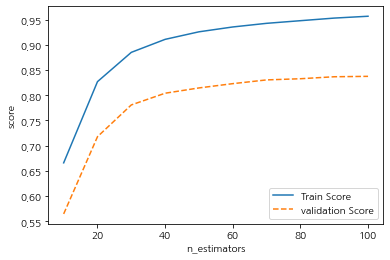

In [10]:
df_score_n.round(3)

plt.plot(para_n_tree,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_n_tree,validation_score, linestyle ='--', label = "validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

트레인 스코어와 테스트 스코어를 보면 30 정도가 적합할거 같음

In [11]:
train_score = []; validation_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GBR(random_state=1234,
             n_estimators=30,
             min_samples_leaf=v_min_samples_leaf
            )
    
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

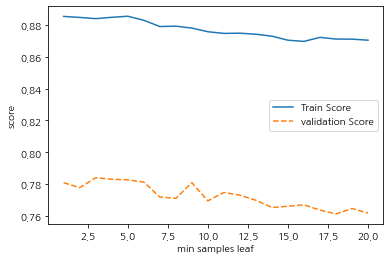

In [12]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,validation_score, linestyle ='--', label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#min_samples_leaf 는 6정도가 적합할거같음

In [13]:
train_score = []; validation_score=[]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb = GBR(random_state=1234,
             n_estimators=30,
             min_samples_leaf=6,
             min_samples_split=v_min_samples_split
            )
    
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score

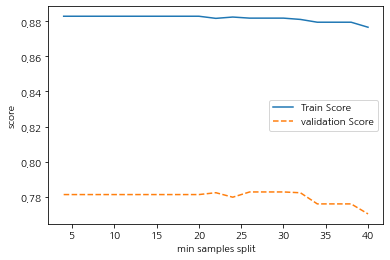

In [14]:
df_score_split.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,validation_score, linestyle ='--', label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()


split은 21정도가 적합해 보임

In [15]:
train_score = []; validation_score=[]

para_depth = [depth * 2 for depth in range(2,21)]

for v_max_depth in para_depth:
    gb = GBR(random_state=1234,
             n_estimators=30,
             min_samples_leaf=6,
             min_samples_split=21,
             max_depth=v_max_depth
            )
    
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidationScore"] = validation_score

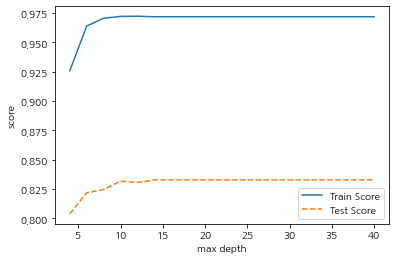

In [16]:
df_score_depth.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,validation_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#depth는 6정도가 적합해보임

In [17]:
train_score = []; validation_score=[]

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GBR(random_state=1234,
             n_estimators=30,
             min_samples_leaf=6,
             min_samples_split=21,
             max_depth=6,
             learning_rate=v_learning_rate
            )
    
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    

    
df_score_lr = pd.DataFrame()
df_score_lr["Depth"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["ValidationScore"] = validation_score

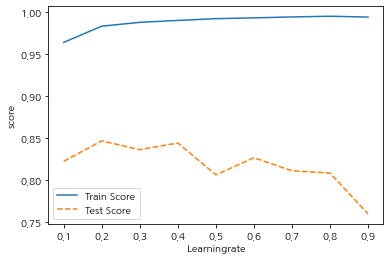

In [18]:
df_score_n.round(3)

plt.plot(para_lr,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_lr,validation_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learningrate")
plt.legend()

lr은 0.2정도가 적합해 보임

In [19]:
gb_final = GBR(n_estimators = 30, min_samples_leaf=6, min_samples_split=21, max_depth=6,learning_rate=0.2, random_state=1234)
gb_final.fit(df_train_x,df_train_y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, min_samples_leaf=6,
                          min_samples_split=21, n_estimators=30,
                          random_state=1234)

In [20]:
gb_final.fit(df_train_x,df_train_y)

print("Score on Training set:{:.3}".format(gb_final.score(df_train_x,df_train_y)))

print("Score on Test set:{:.3}".format(gb_final.score(df_test_x,df_test_y)))

Score on Training set:0.983
Score on Test set:0.879


In [21]:
v_feature_name = df_train_x.columns

In [22]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=gb_final.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.341
0,CEMENT,0.309
3,WATER,0.166
1,BLAST_FURNACE_SLAG,0.069
6,FINE_AGGREGATE,0.035
4,SUPERPLASTICIZER,0.035
5,COARSE_AGGREGATE,0.028
2,FLY_ASH,0.017


Text(0, 0.5, '변수')

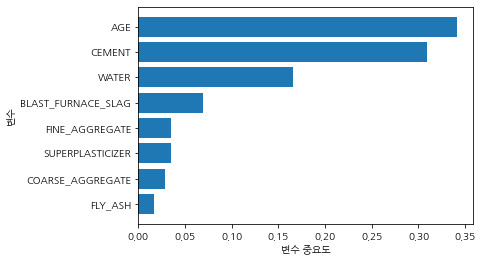

In [23]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결과를 확인해보면 Random Forest와 비교하여 중요 3개 AGE, CEMENT, WATER 순서는 같지만 아래 다른 요소들의 중요성이 상승했다.

In [24]:
from sklearn.model_selection import GridSearchCV
# estimator = GBR(random_state=1234)
# param_grid = {"criterion":["mse", "friedman_mse",'mae'], 'max_features':["auto",'sqrt','log2'],'learning_rate':para_lr,
#              "max_depth":para_depth,"min_samples_leaf":para_leaf}
# grid_gb= GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
# grid_gb.fit(df_train_x,df_train_y)
# print("Best estimator model:\n{}".format(grid_gb.best_estimator_))
# print("\n best parameter:\n{}".format(grid_gb.best_params_))
# print("Best score:\n{}".format(grid_gb.best_score_.round(3)))

# 주성분 분석
목표변수 diagnosis, 0:Malignant(악성,357개), 1:Benign(양성,212개)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import seaborn as sns

In [26]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv", engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df_raw_x = df_raw.drop("diagnosis", axis = 1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [28]:
df_raw_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# sns.pairplot(df_raw_x)

In [30]:
df_raw_x.corr().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


In [31]:
df_raw_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


In [32]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled Data:\n{}".format(nd_scaled[:30].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-0

In [33]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397


In [34]:
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


In [35]:
pca = PCA(n_components=30)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA Data:
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626e-

In [36]:
#주성분 점수 저장 - 주성분수는 변수 수랑 같게
df_pca = pd.DataFrame(nd_pca, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7",
                                      "Prin8","Prin9","Prin10","Prin11","Prin12","Prin13","Prin14",
                                      "Prin15","Prin16","Prin17","Prin18","Prin19","Prin20","Prin21",
                                      "Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28",
                                      "Prin29","Prin30"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [37]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,31)]
df_pca_stat["EigenValues"]= pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


적정 주성분 선택: 상관계수 기준(고유값>1) 6개 공분산 기준(고유값 누적비율 >0.8) 5개로 
선택할 수 있다.

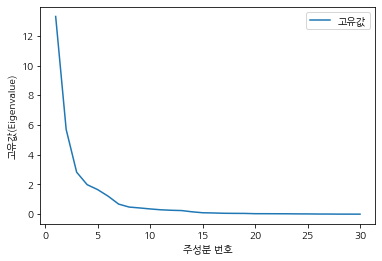

In [38]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label="고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

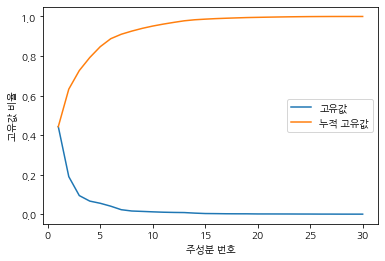

In [39]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

5~6개가 주성분의 개수로 볼수 있다.

In [40]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                                                columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7",
                                      "Prin8","Prin9","Prin10","Prin11","Prin12","Prin13","Prin14",
                                      "Prin15","Prin16","Prin17","Prin18","Prin19","Prin20","Prin21",
                                      "Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28",
                                      "Prin29","Prin30"])],axis =1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean radius,-0.219,0.234,0.009,-0.041,-0.038,-0.019,0.124,0.007,0.223,...,0.069,-0.073,0.099,-0.183,-0.019,0.129,0.132,-0.211,-0.211,0.702
1,mean texture,-0.104,0.060,-0.065,0.603,0.049,0.032,-0.011,-0.131,-0.113,...,-0.448,-0.095,0.001,0.099,0.085,0.025,0.017,0.000,0.011,0.000
2,mean perimeter,-0.228,0.215,0.009,-0.042,-0.037,-0.017,0.114,0.019,0.224,...,0.070,-0.075,0.040,-0.117,0.027,0.125,0.115,-0.084,-0.384,-0.690
3,mean area,-0.221,0.231,-0.029,-0.053,-0.010,0.002,0.052,-0.035,0.196,...,0.018,-0.098,-0.008,0.070,-0.210,-0.363,-0.467,0.273,0.423,-0.033
4,mean smoothness,-0.143,-0.186,0.104,-0.159,0.365,0.286,0.141,0.289,-0.006,...,0.119,-0.064,0.021,0.069,0.029,0.037,-0.070,-0.001,0.003,-0.005
5,mean compactness,-0.239,-0.152,0.074,-0.032,-0.012,0.014,-0.031,0.151,0.168,...,-0.193,0.098,-0.052,-0.104,0.397,-0.263,-0.098,0.005,0.041,0.045
6,mean concavity,-0.258,-0.060,-0.003,-0.019,-0.086,0.009,0.108,0.073,-0.041,...,-0.006,0.185,-0.325,0.045,-0.097,0.549,-0.365,-0.046,0.010,0.025
7,mean concave points,-0.261,0.035,0.026,-0.065,0.044,0.052,0.150,0.152,0.112,...,0.009,0.312,0.051,0.084,-0.186,-0.388,0.455,0.009,0.004,-0.001
8,mean symmetry,-0.138,-0.190,0.040,-0.067,0.306,-0.356,0.094,0.232,-0.256,...,0.087,0.018,0.051,0.019,-0.025,0.016,0.015,-0.001,0.008,-0.001
9,mean fractal dimension,-0.064,-0.367,0.023,-0.049,0.044,0.119,-0.296,0.177,0.124,...,0.076,-0.288,0.085,-0.133,-0.207,0.097,0.101,0.006,-0.007,-0.005


In [41]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          6.05e-153
Time:                        15:19:37   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# 주성분분석으로 차원을 축소하기 전의 설명도는 0.774이다.

In [42]:
x_var = ["Prin1","Prin2","Prin3","Prin4","Prin5"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     270.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          5.84e-147
Time:                        15:19:37   Log-Likelihood:                -45.826
No. Observations:                 569   AIC:                             103.7
Df Residuals:                     563   BIC:                             129.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.708      0.0

 # 주성분을 5개까지 했을 때는 설명력이 0.706으로 0.068정도 감소한것을 볼 수 있다.

In [43]:
x_var = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     224.8
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          8.92e-146
Time:                        15:19:37   Log-Likelihood:                -45.700
No. Observations:                 569   AIC:                             105.4
Df Residuals:                     562   BIC:                             135.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.686      0.0

 # 주성분을 6개까지 했을 때는 설명력이 0.706으로 주성분 5개까지와 설명력이 차이가 없고  Prin6의 P밸류는 0.618로 상당히 큰것을 보아 제거하는게 좋을것같다. 결론적으로 주성분 5개로 하면된다.


In [44]:
# 